In [1]:
import pandas as pd

In [2]:
import gensim
import numpy as np
from gensim.models.fasttext import FastText
from gensim.models import KeyedVectors

In [3]:
# Define constants with vector sizes
WORD_VECTOR_SIZE = 300
DOCUMENT_VECTOR_SIZE = 300

In [6]:
?FastText.load

Signature: FastText.load(*args, **kwargs)
Docstring:
Load a previously saved `FastText` model.

Parameters
----------
fname : str
    Path to the saved file.

Returns
-------
:class:`~gensim.models.fasttext.FastText`
    Loaded model.

See Also
--------
:meth:`~gensim.models.fasttext.FastText.save`
    Save :class:`~gensim.models.fasttext.FastText` model.
File:      ~/workspace/python-envs/lda-venv/lib/python3.9/site-packages/gensim/models/fasttext.py
Type:      method

In [5]:
fasttext_model = FastText.load_fasttext_format("./cc.uk.300.bin")

/var/folders/mc/36xkpyzx5hn6t7wmy23pdz5c0000gn/T/ipykernel_83286/2520148456.py:1: DeprecationWarning: Call to deprecated `load_fasttext_format` (use load_facebook_vectors (to use pretrained embeddings) or load_facebook_model (to continue training with the loaded full model, more RAM) instead).
  fasttext_model = FastText.load_fasttext_format("./cc.uk.300.bin")


In [5]:
df = pd.read_parquet('posts_reactions_df.parquet')

corpus = df['lemmatized_text_filtered'].to_list()

In [49]:
df['lemmatized_text_filtered_word_count'] = df['lemmatized_text_filtered'].apply(lambda x: len(x.split()))

In [51]:
print("mean:", np.mean(df['lemmatized_text_filtered_word_count']))
print("median:", np.median(df['lemmatized_text_filtered_word_count']))
print("25th percentile:", np.percentile(df['lemmatized_text_filtered_word_count'], 25))
print("75th percentile:", np.percentile(df['lemmatized_text_filtered_word_count'], 75))
print("90th percentile:", np.percentile(df['lemmatized_text_filtered_word_count'], 90))
print("95th percentile:", np.percentile(df['lemmatized_text_filtered_word_count'], 95))
print("99th percentile:", np.percentile(df['lemmatized_text_filtered_word_count'], 99))

mean: 62.916968277624015
median: 48.0
25th percentile: 30.0
75th percentile: 74.0
90th percentile: 127.0
95th percentile: 168.0
99th percentile: 294.0799999999999


In [37]:
df

,channel_name,message_id,text,views,forwards,Positive,Negative,Neutral,Funny,Miscellaneous,...,month,year-month,season,year-season,text_preprocessed,text_len,word_count,processed_text,lemmatized_text,lemmatized_text_filtered
0,dw_ukraina,29189,​​У південнокорейському Пусані завершилися пе...,1802,5,28.0,12.0,0.0,0.0,0.0,...,12,2024-12,Winter,2024-Winter,​​У південнокорейському Пусані завершилися пе...,241,29,​​у південнокорейському пусані завершилися пер...,​​у південнокорейський пусан завершитися перег...,південнокорейський пусан завершитися переговор...
1,dw_ukraina,29200,На дев'яти заводах VW проходить попереджувальн...,1677,6,3.0,15.0,0.0,0.0,0.0,...,12,2024-12,Winter,2024-Winter,На дев'яти заводах VW проходить попереджувальн...,455,60,на девяти заводах vw проходить попереджувальни...,девяти завод проходити попереджувальний страйк...,девяти завод проходити попереджувальний страйк...
2,dw_ukraina,29203,🇩🇪🇺🇦 Олаф Шольц і Володимир Зеленський оглянул...,1593,6,28.0,0.0,0.0,0.0,0.0,...,12,2024-12,Winter,2024-Winter,🇩🇪🇺🇦 Олаф Шольц і Володимир Зеленський оглянул...,499,63,олаф шольц і володимир зеленський оглянули зра...,олаф шольц володимир зеленський оглянути зразо...,олаф шольц володимир зеленський оглянути зразо...
3,dw_ukraina,29259,🪖 Українська ППО збила 29 дронів РФ\n\nУ ніч п...,1417,0,15.0,0.0,0.0,0.0,0.0,...,12,2024-12,Winter,2024-Winter,🪖 Українська ППО збила 29 дронів РФ\n\nУ ніч п...,506,66,українська ппо збила 29 дронів рф у ніч проти ...,український ппо збити дрон ніч середа військо ...,український ппо збити дрон ніч середа військо ...
4,dw_ukraina,29269,"💬 ""Цю ціль виконати реалістично""\n\nУкраїна ак...",1503,4,23.0,0.0,0.0,0.0,0.0,...,12,2024-12,Winter,2024-Winter,"💬 ""Цю ціль виконати реалістично""\n\nУкраїна ак...",187,27,цю ціль виконати реалістично україна активно з...,ціль виконати реалістично україна активно заст...,ціль виконати реалістично україна активно заст...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4692,babel,62214,У Лос-Анджелесі зросла кількість загиблих чере...,15425,49,18.0,423.0,4.0,0.0,0.0,...,1,2025-1,Winter,2025-Winter,У Лос-Анджелесі зросла кількість загиблих чере...,280,39,у лосанджелесі зросла кількість загиблих через...,лосанджелесі зрости кількість загиблих масштаб...,лосанджелесі зрости кількість загиблих масштаб...
4693,babel,62271,Прем’єр Гренландії Муте Егеде виступив за неза...,20646,110,295.0,88.0,172.0,0.0,0.0,...,1,2025-1,Winter,2025-Winter,Прем’єр Гренландії Муте Егеде виступив за неза...,505,68,прем’єр гренландії муте егеде виступив за неза...,прем’єр гренландія муте егеде виступити незале...,прем’єр гренландія муте егеде виступити незале...
4694,babel,62279,🇺🇸 Кількість загиблих у пожежах Лос-Анджелесу ...,16019,48,34.0,327.0,7.0,0.0,0.0,...,1,2025-1,Winter,2025-Winter,🇺🇸 Кількість загиблих у пожежах Лос-Анджелесу ...,716,104,кількість загиблих у пожежах лосанджелесу зрос...,кількість загиблих пожежа лосанджелесу зрости ...,кількість загиблих пожежа лосанджелесу зрости ...
4695,babel,62296,"⚫️ Обстріл Запоріжжя, полонені з КНДР і «Рамшт...",17919,6,96.0,40.0,11.0,0.0,0.0,...,1,2025-1,Winter,2025-Winter,"⚫️ Обстріл Запоріжжя, полонені з КНДР і «Рамшт...",835,117,обстріл запоріжжя полонені з кндр і рамштайн г...,обстріл запоріжжя полонений кндр рамштайн голо...,обстріл запоріжжя полонений кндр рамштайн голо...


1. build a regression model to assign reaction score to the remaining messages
2. find optimal hyperparameters for t-SNE segmentation (grid search, Bayesian optimization) - play with UMAP (https://umap-learn.readthedocs.io/en/latest/)
3. perfrom named entity recognition (NLP) - https://spacy.io/ https://github.com/lang-uk/ner-uk https://huggingface.co/ukr-models/uk-ner
4. image processing > cluster/segment images > concat with text data > use for analytics etc.

In [36]:
df.reactions_score

0       0.400000
1      -0.666667
2       1.000000
3       1.000000
4       1.000000
          ...   
4692   -0.910112
4693    0.366372
4694   -0.796196
4695    0.380952
4696    0.050562
Name: reactions_score, Length: 4697, dtype: float64

In [5]:
corpus[0]

'південнокорейський пусан завершитися переговори представник 170 країна світ укладання договір боротьба пластиковий забруднення угода вдатися досягти вирішити продовжити переговори наступний рок'

#### Build custom fastText model with embedding size 64

In [6]:
# Tokenize and preprocess the text data
def preprocess_text(text):
    return text.lower().split()

# Tokenize and preprocess the training data
tokenized_corpus = [preprocess_text(text) for text in corpus]

In [9]:
# Define constants with vector sizes
WORD_VECTOR_SIZE = 64
DOCUMENT_VECTOR_SIZE = 64


# Train the FastText model
fasttext_model = FastText(vector_size=WORD_VECTOR_SIZE, window=10, min_count=3, sg=1, workers=8)
fasttext_model.build_vocab(corpus_iterable=tokenized_corpus)
fasttext_model.train(corpus_iterable=tokenized_corpus, total_examples=len(tokenized_corpus), epochs=20)

(5271488, 5910420)

In [10]:
# fasttext_model.save("cc.uk.64.custom.bin")

In [3]:
fasttext_model = FastText.load("cc.uk.64.custom.bin")

### Vectorization method #1 - Averaging of word embeddings

In [6]:
# Tokenize and preprocess the text data
def preprocess_text(text):
    return text.lower().split()

# Tokenize and preprocess the training data
tokenized_corpus = [preprocess_text(text) for text in corpus]

In [7]:
tokenized_corpus[0]

['південнокорейський',
 'пусан',
 'завершитися',
 'переговори',
 'представник',
 '170',
 'країна',
 'світ',
 'укладання',
 'договір',
 'боротьба',
 'пластиковий',
 'забруднення',
 'угода',
 'вдатися',
 'досягти',
 'вирішити',
 'продовжити',
 'переговори',
 'наступний',
 'рок']

In [8]:
len(fasttext_model.wv[tokenized_corpus[0][0]])

64

In [9]:
# Create document vectors using fastText model
docVec = []

for i in range(len(tokenized_corpus)):
    # print(i)
    wordVectors = fasttext_model.wv[tokenized_corpus[i]]
    docVecEntity = np.add(0, wordVectors.sum(axis=0))
    docVecResult = np.divide(docVecEntity, len(tokenized_corpus[i]))

    docVec.append(docVecResult)

### Perform PCA and t-SNE (word embedding size = 300)

In [58]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA

In [11]:
# Apply PCA for initial dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(docVec)

/var/folders/mc/36xkpyzx5hn6t7wmy23pdz5c0000gn/T/ipykernel_5199/1673630353.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], cmap='tab10', s=1)


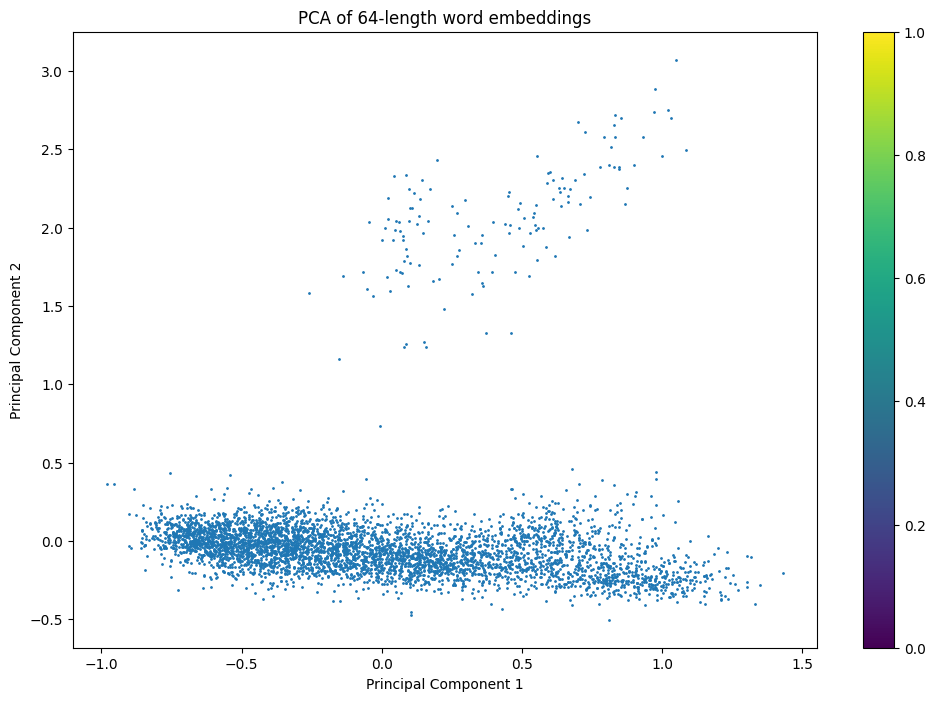

In [12]:
# Plotting with Matplotlib
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], cmap='tab10', s=1)
plt.colorbar(scatter)
plt.title('PCA of 64-length word embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [66]:
np.array(docVec).shape

(4697, 300)

In [41]:
docVec[0]

array([-0.11398246, -0.05407755, -0.0395888 ,  0.00432219,  0.09868572,
       -0.38721204,  0.04792277,  0.19804719,  0.23653662, -0.0886881 ,
        0.2752028 , -0.2738605 ,  0.43605432,  0.24411353, -0.01377159,
       -0.11474415,  0.01766744, -0.15628254, -0.19578382, -0.35249546,
       -0.3535441 ,  0.22104338, -0.0242388 , -0.14985393, -0.16753635,
        0.43063563, -0.0205884 , -0.07415625,  0.2972313 , -0.28259853,
       -0.27661788, -0.14643809, -0.25865674,  0.24178264, -0.0292215 ,
        0.30949506, -0.17867744, -0.3070066 , -0.17107993, -0.07682959,
        0.24180786,  0.2639441 , -0.17880842,  0.18009952,  0.5124175 ,
        0.06769498,  0.18006596,  0.23946501, -0.06500625,  0.21600746,
       -0.08354735,  0.11264652,  0.2463557 ,  0.5462702 , -0.5315711 ,
       -0.03218952, -0.35798806,  0.02337374, -0.01970946, -0.13412309,
       -0.2919694 ,  0.21267153, -0.20406042, -0.44901118], dtype=float32)

In [43]:
docVec[0][:2]

array([-0.11398246, -0.05407755], dtype=float32)

In [44]:
len(docVec)

4697

In [23]:
tsne.kl_divergence_

1.5805976390838623

In [67]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(np.array(docVec))

In [45]:
tsne.kl_divergence_

1.4416897296905518

/var/folders/mc/36xkpyzx5hn6t7wmy23pdz5c0000gn/T/ipykernel_83286/2645350204.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap='tab10', s=1)
/Users/Taras_Ustyianovych/workspace/python-envs/lda-venv/lib/python3.9/site-packages/matplotlib/collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


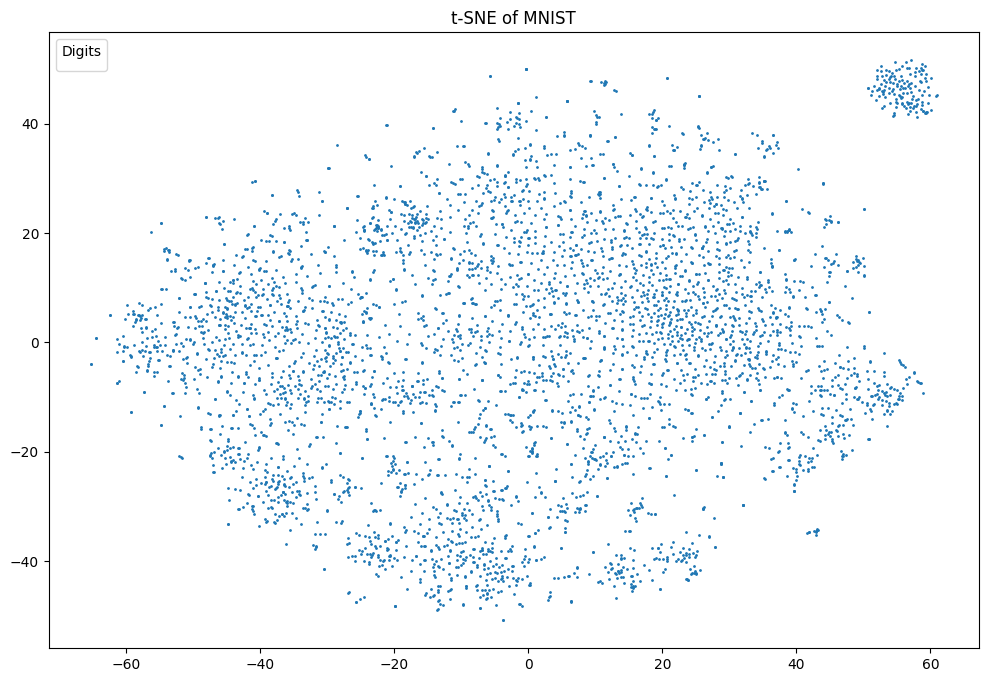

In [69]:
# Plot the result
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap='tab10', s=1)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title('t-SNE of MNIST')
plt.show()

/var/folders/mc/36xkpyzx5hn6t7wmy23pdz5c0000gn/T/ipykernel_83286/1496417444.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], cmap='tab10', s=1)
/Users/Taras_Ustyianovych/workspace/python-envs/lda-venv/lib/python3.9/site-packages/matplotlib/collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


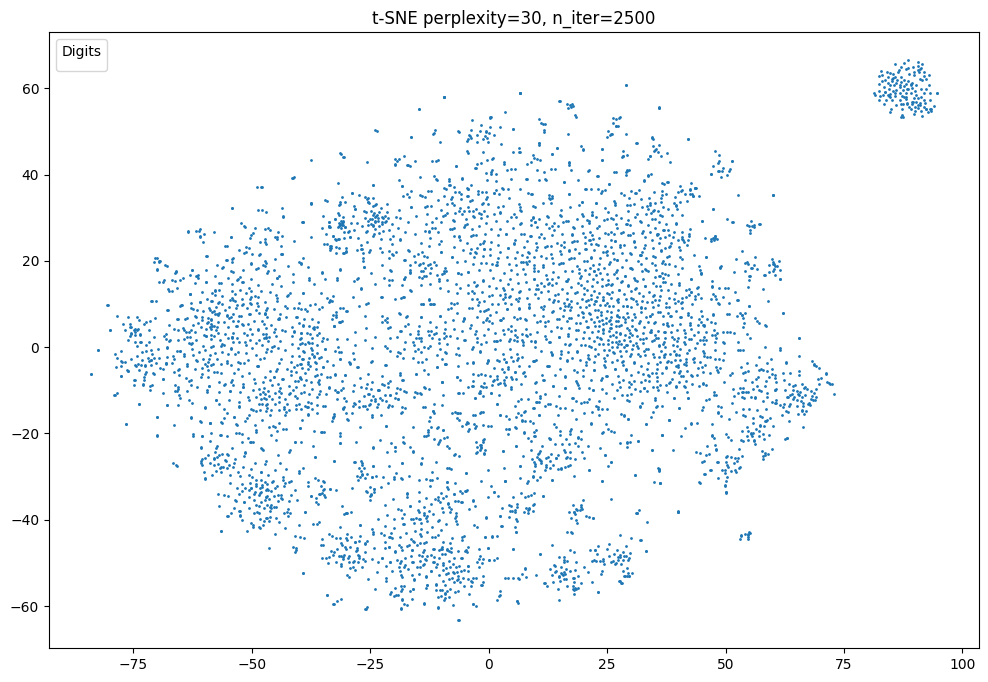

In [70]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=2500, random_state=42)
tsne_results = tsne.fit_transform(np.array(docVec))

# Plot the result
plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], cmap='tab10', s=1)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title('t-SNE perplexity=30, n_iter=2500')
plt.show()

/var/folders/mc/36xkpyzx5hn6t7wmy23pdz5c0000gn/T/ipykernel_83286/1298260757.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], cmap='tab10', s=1)
/Users/Taras_Ustyianovych/workspace/python-envs/lda-venv/lib/python3.9/site-packages/matplotlib/collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


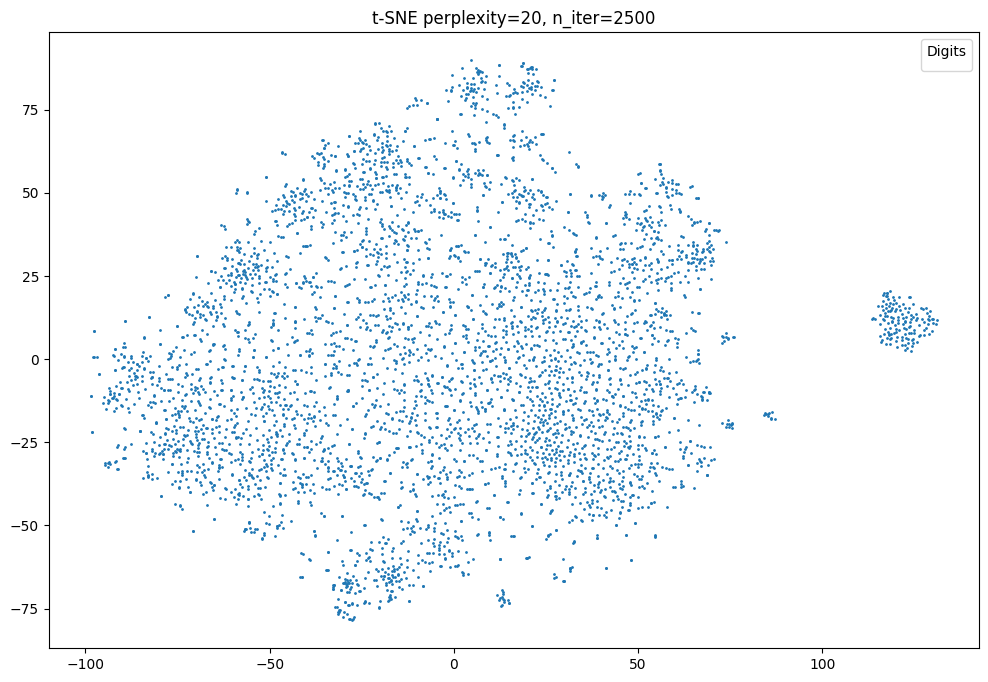

In [72]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=20, n_iter=2500, random_state=42)
tsne_results = tsne.fit_transform(np.array(docVec))

# Plot the result
plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], cmap='tab10', s=1)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title('t-SNE perplexity=20, n_iter=2500')
plt.show()

/var/folders/mc/36xkpyzx5hn6t7wmy23pdz5c0000gn/T/ipykernel_83286/603506145.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], cmap='tab10', s=1)
/Users/Taras_Ustyianovych/workspace/python-envs/lda-venv/lib/python3.9/site-packages/matplotlib/collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


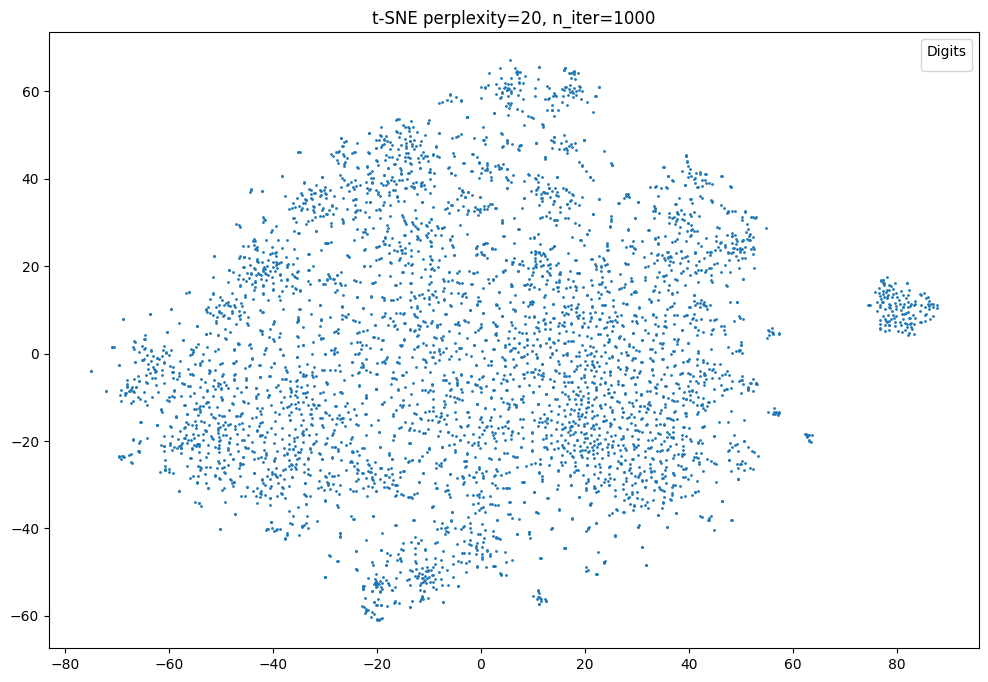

In [71]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=20, n_iter=1000, random_state=42)
tsne_results = tsne.fit_transform(np.array(docVec))

# Plot the result
plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], cmap='tab10', s=1)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title('t-SNE perplexity=20, n_iter=1000')
plt.show()

/var/folders/mc/36xkpyzx5hn6t7wmy23pdz5c0000gn/T/ipykernel_83286/3252861814.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], cmap='tab10', s=1)
/Users/Taras_Ustyianovych/workspace/python-envs/lda-venv/lib/python3.9/site-packages/matplotlib/collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


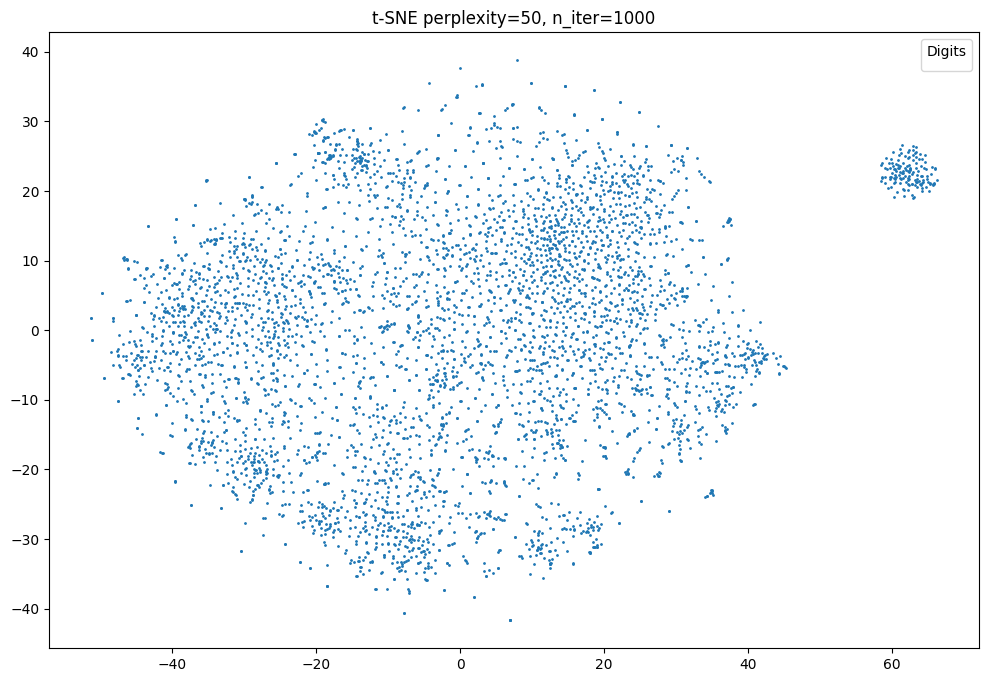

In [74]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=50, n_iter=1000, random_state=42)
tsne_results = tsne.fit_transform(np.array(docVec))

# Plot the result
plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], cmap='tab10', s=1)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title('t-SNE perplexity=50, n_iter=1000')
plt.show()

/var/folders/mc/36xkpyzx5hn6t7wmy23pdz5c0000gn/T/ipykernel_83286/7835018.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], cmap='tab10', s=1)
/Users/Taras_Ustyianovych/workspace/python-envs/lda-venv/lib/python3.9/site-packages/matplotlib/collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


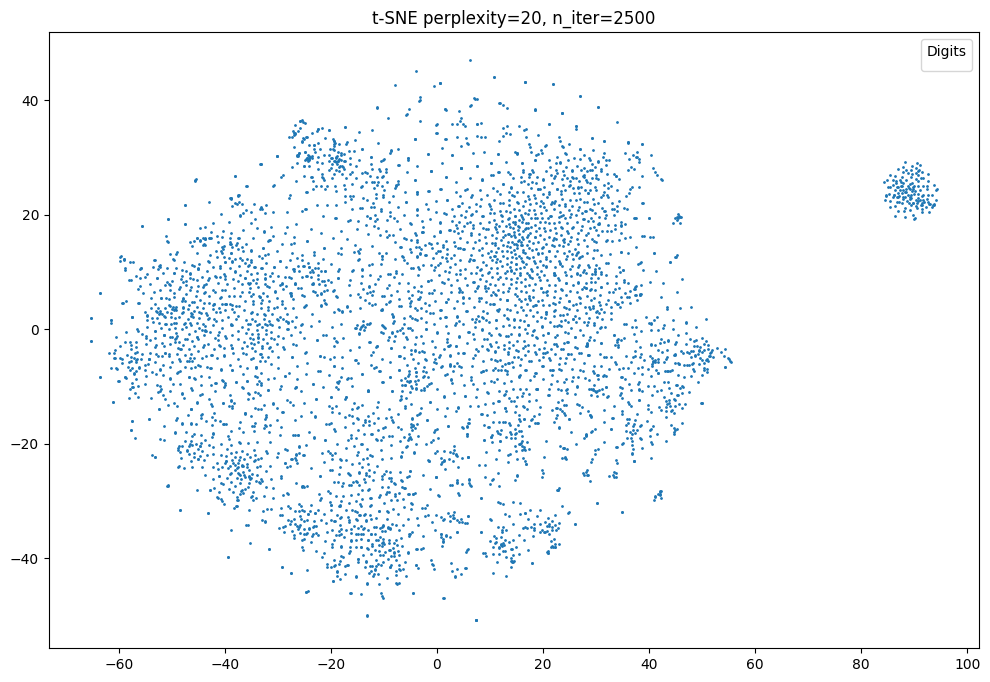

In [73]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=50, n_iter=2500, random_state=42)
tsne_results = tsne.fit_transform(np.array(docVec))

# Plot the result
plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], cmap='tab10', s=1)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title('t-SNE perplexity=50, n_iter=2500')
plt.show()

/var/folders/mc/36xkpyzx5hn6t7wmy23pdz5c0000gn/T/ipykernel_83286/2570535124.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], cmap='tab10', s=1)
/Users/Taras_Ustyianovych/workspace/python-envs/lda-venv/lib/python3.9/site-packages/matplotlib/collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


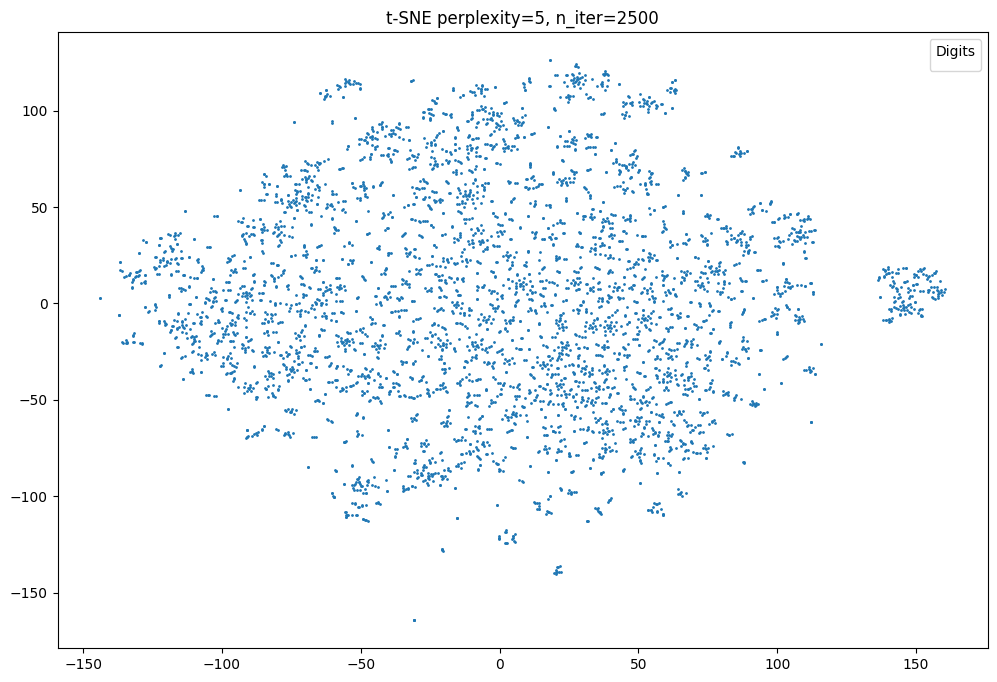

In [75]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=5, n_iter=2500, random_state=42)
tsne_results = tsne.fit_transform(np.array(docVec))

# Plot the result
plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], cmap='tab10', s=1)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title('t-SNE perplexity=5, n_iter=2500')
plt.show()

/var/folders/mc/36xkpyzx5hn6t7wmy23pdz5c0000gn/T/ipykernel_83286/2477508815.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], cmap='tab10', s=1)
/Users/Taras_Ustyianovych/workspace/python-envs/lda-venv/lib/python3.9/site-packages/matplotlib/collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


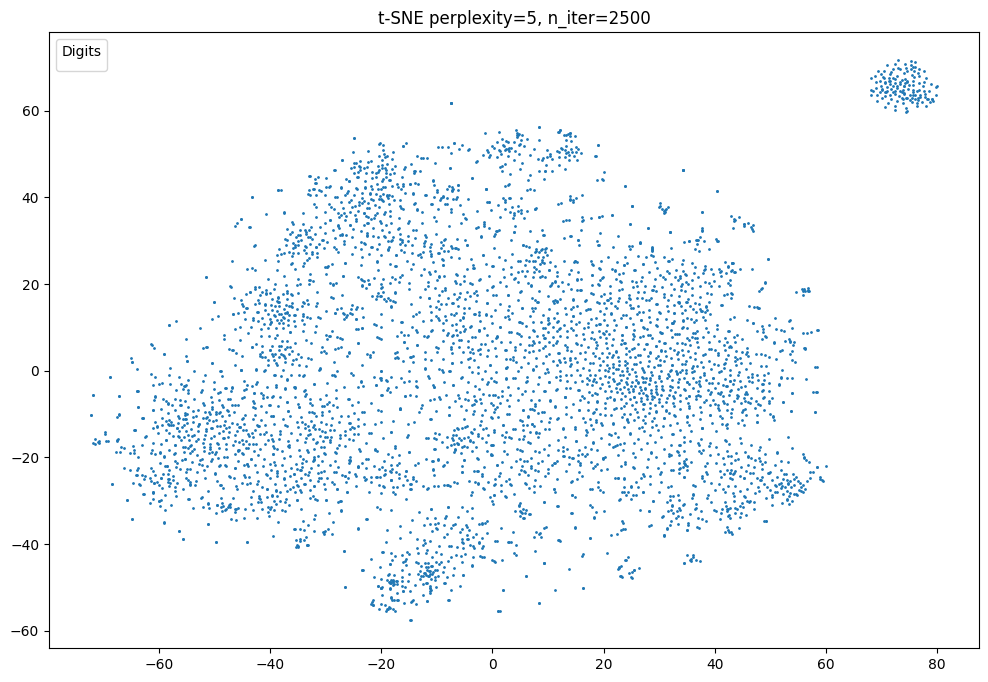

In [81]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=40, n_iter=4000, random_state=42)
tsne_results = tsne.fit_transform(np.array(docVec))

# Plot the result
plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], cmap='tab10', s=1)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title('t-SNE perplexity=5, n_iter=2500')
plt.show()

### Perform PCA and t-SNE (word embedding size = 64)

In [10]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA

In [13]:
# Apply PCA for initial dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(docVec)

/var/folders/mc/36xkpyzx5hn6t7wmy23pdz5c0000gn/T/ipykernel_5199/1673630353.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], cmap='tab10', s=1)


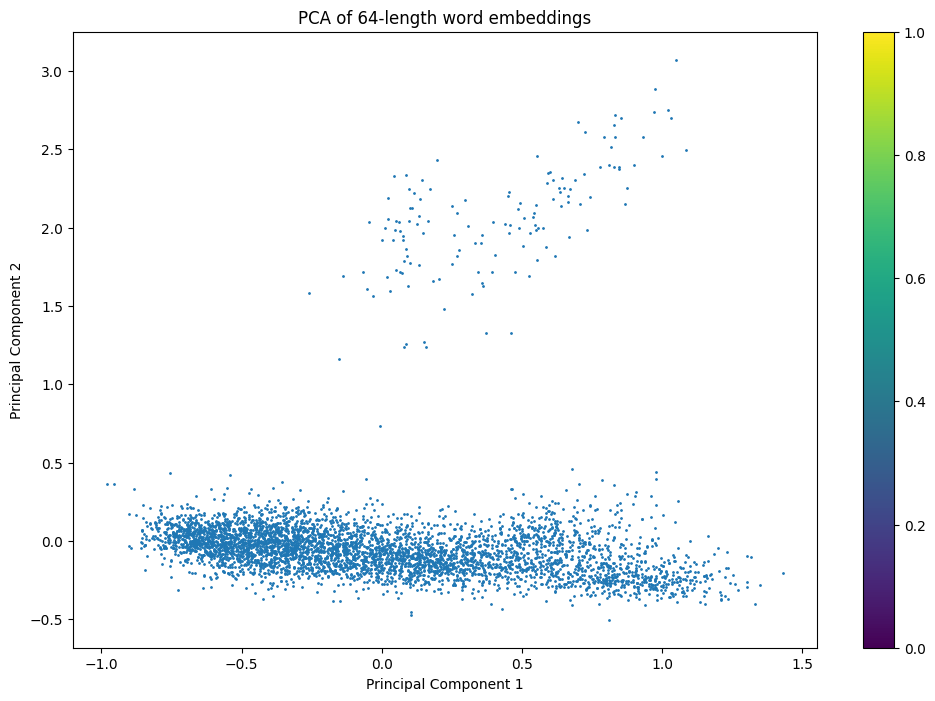

In [14]:
# Plotting with Matplotlib
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], cmap='tab10', s=1)
plt.colorbar(scatter)
plt.title('PCA of 64-length word embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [27]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_result = tsne.fit_transform(np.array(docVec))
print(tsne.kl_divergence_)

1.5805976390838623


/var/folders/mc/36xkpyzx5hn6t7wmy23pdz5c0000gn/T/ipykernel_5199/2502957610.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], cmap='tab10', s=1)
/Users/Taras_Ustyianovych/workspace/python-envs/lda-venv/lib/python3.9/site-packages/matplotlib/collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


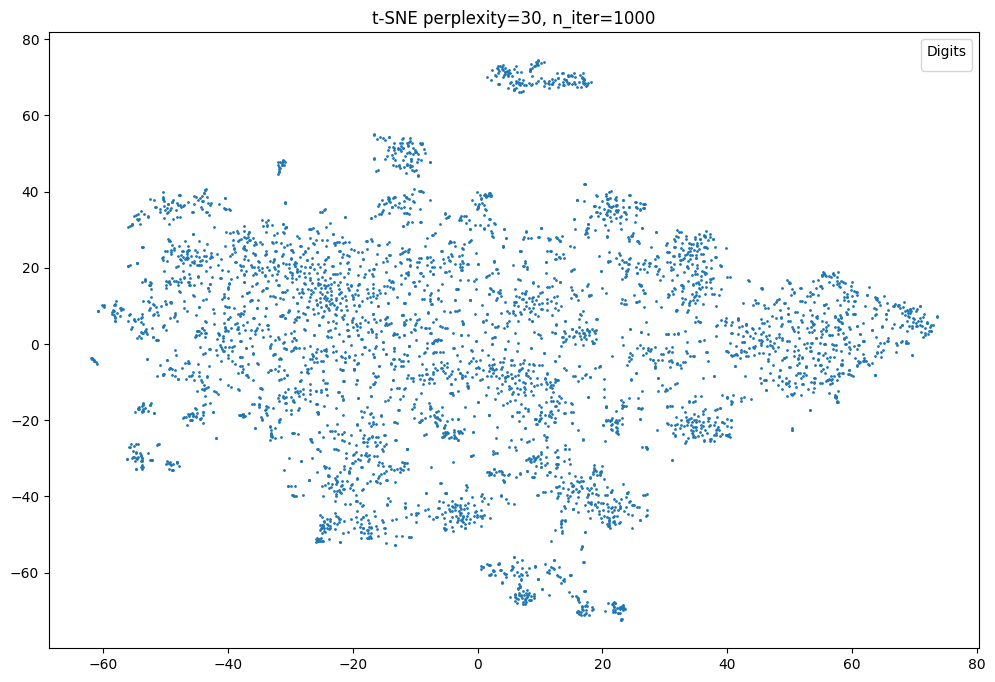

In [18]:
# Plot the result
plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], cmap='tab10', s=1)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title('t-SNE perplexity=30, n_iter=1000')
plt.show()

In [24]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=2500, random_state=42)
tsne_result = tsne.fit_transform(np.array(docVec))
print(tsne.kl_divergence_)

1.5375440120697021


/var/folders/mc/36xkpyzx5hn6t7wmy23pdz5c0000gn/T/ipykernel_5199/3961889011.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], cmap='tab10', s=1)


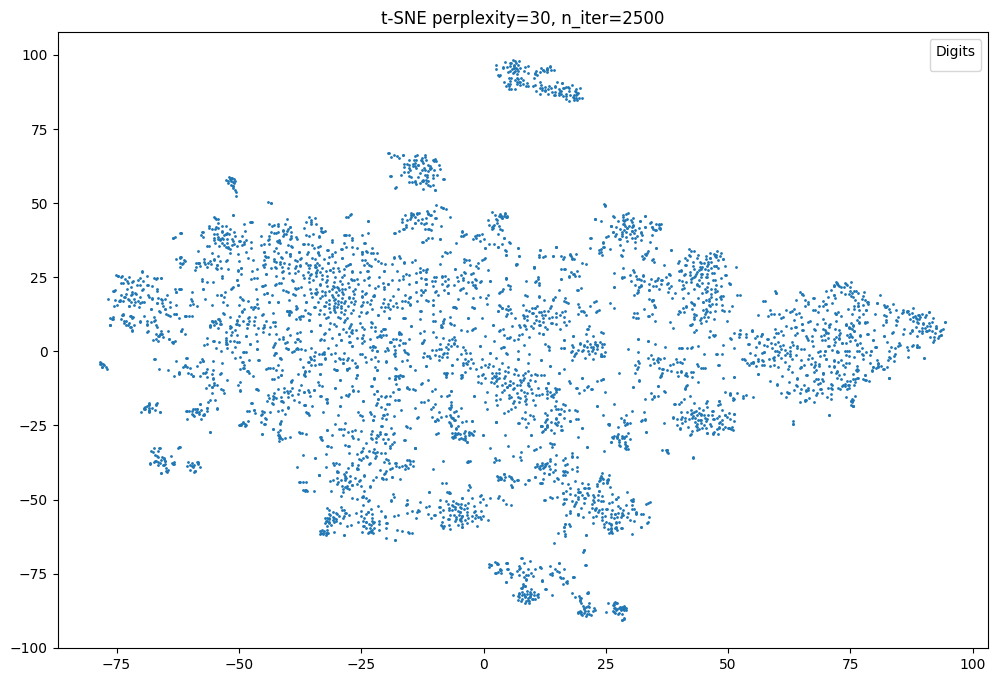

In [26]:
# Plot the result
plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], cmap='tab10', s=1)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title('t-SNE perplexity=30, n_iter=2500')
plt.show()

In [28]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=20, n_iter=2500, random_state=42)
tsne_result = tsne.fit_transform(np.array(docVec))
print(tsne.kl_divergence_)

1.5795637369155884


/var/folders/mc/36xkpyzx5hn6t7wmy23pdz5c0000gn/T/ipykernel_5199/3961889011.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], cmap='tab10', s=1)
/Users/Taras_Ustyianovych/workspace/python-envs/lda-venv/lib/python3.9/site-packages/matplotlib/collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


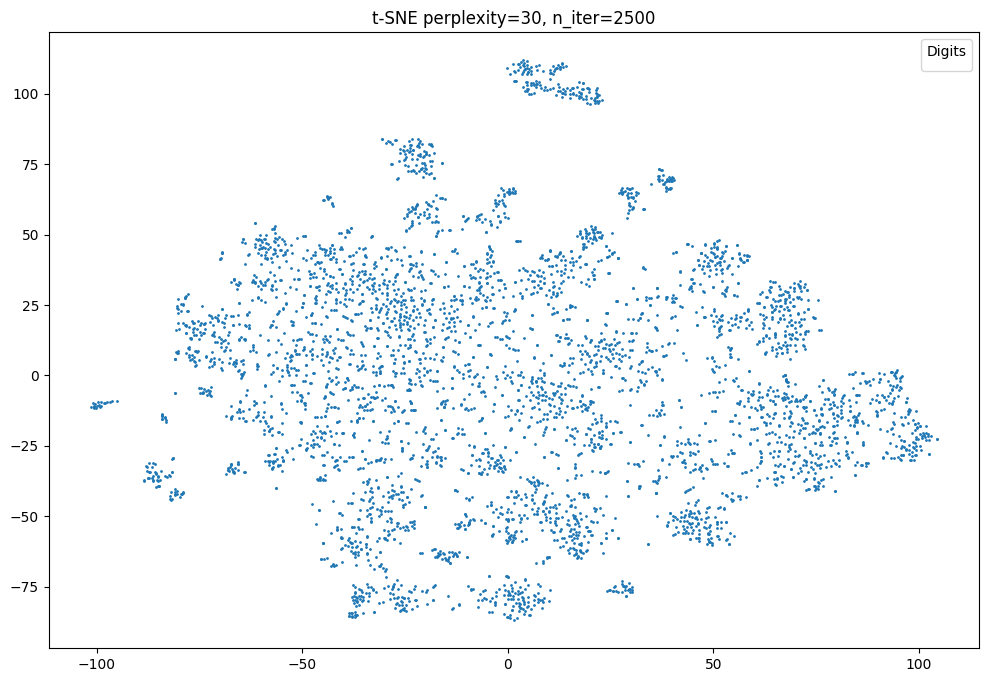

In [29]:
# Plot the result
plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], cmap='tab10', s=1)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title('t-SNE perplexity=30, n_iter=2500')
plt.show()

In [30]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=40, n_iter=3500, random_state=42)
tsne_result = tsne.fit_transform(np.array(docVec))
print(tsne.kl_divergence_)

1.481628179550171


/var/folders/mc/36xkpyzx5hn6t7wmy23pdz5c0000gn/T/ipykernel_5199/3961889011.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], cmap='tab10', s=1)
/Users/Taras_Ustyianovych/workspace/python-envs/lda-venv/lib/python3.9/site-packages/matplotlib/collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


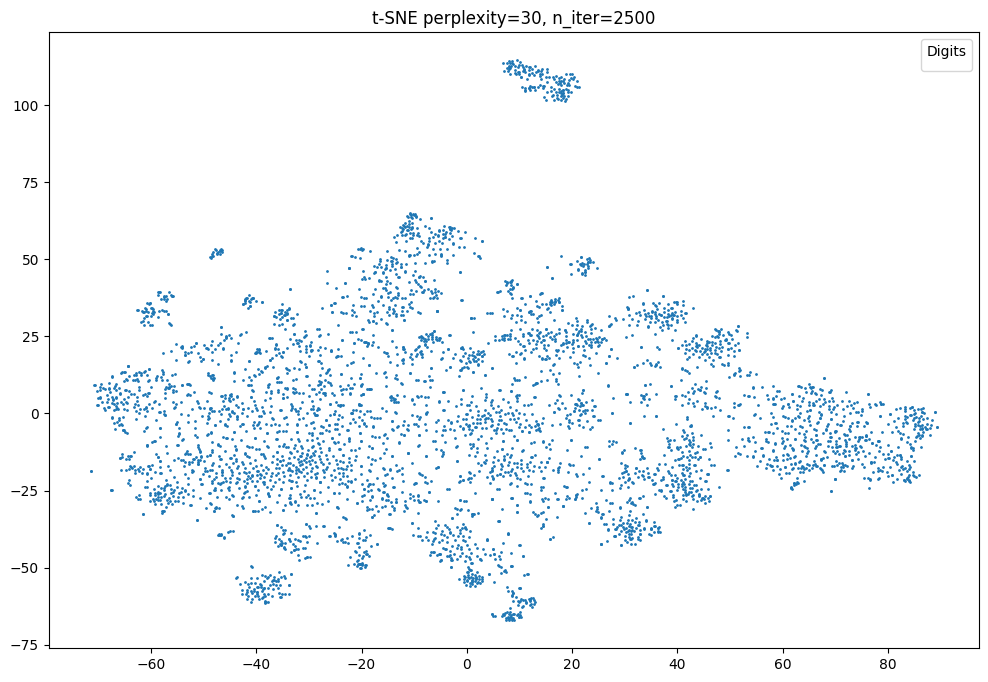

In [31]:
# Plot the result
plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], cmap='tab10', s=1)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title('t-SNE perplexity=30, n_iter=2500')
plt.show()

In [32]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=50, n_iter=5000, random_state=42)
tsne_result = tsne.fit_transform(np.array(docVec))
print(tsne.kl_divergence_)

1.4416897296905518


/var/folders/mc/36xkpyzx5hn6t7wmy23pdz5c0000gn/T/ipykernel_5199/1043769447.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], cmap='tab10', s=1)
/Users/Taras_Ustyianovych/workspace/python-envs/lda-venv/lib/python3.9/site-packages/matplotlib/collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


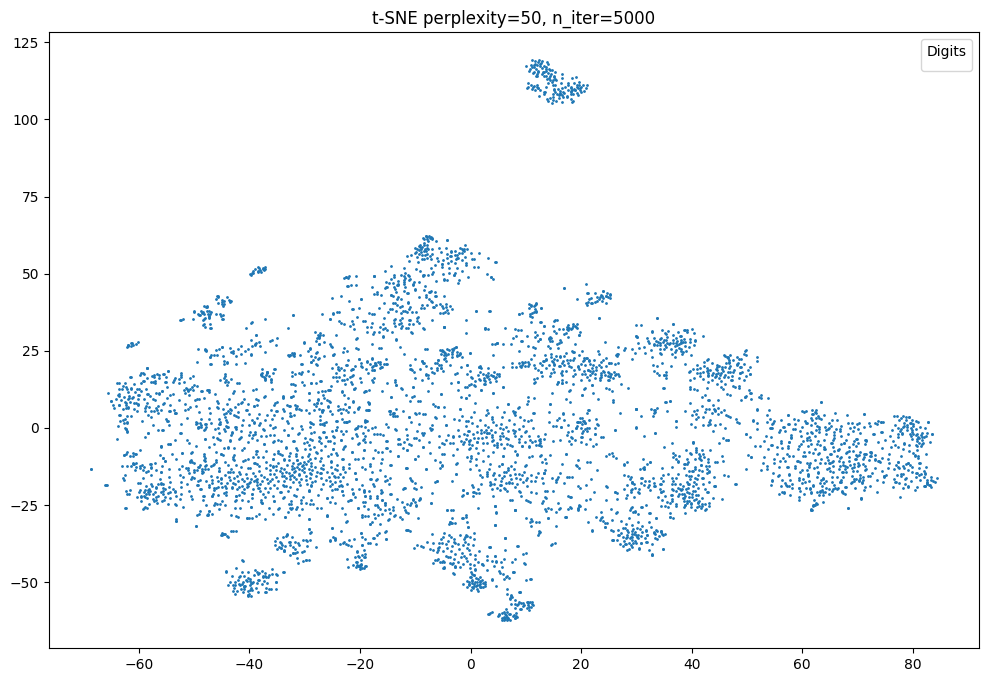

In [33]:
# Plot the result
plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], cmap='tab10', s=1)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title('t-SNE perplexity=50, n_iter=5000')
plt.show()